# ***Clevland Heart Disease Dataset***

## 📁 Task 1: Dataset Loading & Cleaning

### 🔹 Import Libraries

In [1]:
# Importing all function needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Enable inline plotting for Jupyter notebooks
%matplotlib inline


### 🔹 Load the Cleveland Heart Disease Dataset with Error Handling

In [2]:

# 2. Loading the Data/File

local_filename = r"datasets\heart+disease\processed.cleveland.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

try:
    if not os.path.exists(local_filename):
        print("File not found locally. Attempting to download from URL...")
        df = pd.read_csv(url, names=column_names)
        df.to_csv(local_filename, index=False)
    else:
        print("Loading data from local file...")
        df = pd.read_csv(local_filename, names=column_names)
        df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

except Exception as e:
    print(f"An error occurred: {e}")

print()


Loading data from local file...



### 🔹 Inspect the Dataset

In [3]:

# 3. Inspect/Explore the Cleveland Heart Disease Dataset

#  Prints the first few rows of the dataset
print("First Few Rows of Cleveland Dataset: ")
print()
print(f"{df.head()}\n")


# Clevland Dataset DataTypes
print("Cleveland Dataset DataTypes: ")
print()
print(f"{df.dtypes}\n")
print()
print(f"'{df.info()}")

# Inspect if there be any empty/missing values
print(f"Missing values per column ---> Columns: {df.columns}")
print(f"Columns: {df.columns.isnull()}\n")

print("Missing values in the entire dataset: ")
print(f"{df.isnull().sum().sum()}\n")



First Few Rows of Cleveland Dataset: 

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   0.0  1.0  2.0       3.0    4.0  5.0      6.0      7.0    8.0      9.0   
1  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
2  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
3  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
4  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   

   slope   ca thal  target  
0   10.0   11   12       1  
1    3.0  0.0  6.0       0  
2    2.0  3.0  3.0       1  
3    2.0  2.0  7.0       1  
4    3.0  0.0  3.0       0  

Cleveland Dataset DataTypes: 

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: objec

## 📊 Task 2: Basic Data Analysis

### 🔹 Summary Statistics

In [4]:
# BASIC DATA ANALYSIS
print("Basic Statistics such as, Mean, Median, Standard Deviation etc.: ")
print()
print(f"{df.describe()}\n")


Basic Statistics such as, Mean, Median, Standard Deviation etc.: 

              age         sex          cp    trestbps        chol         fbs  \
count  304.000000  304.000000  304.000000  304.000000  304.000000  304.000000   
mean    54.259868    0.680921    3.154605  131.266447  245.894737    0.164474   
std      9.548637    0.466888    0.960840   19.057964   53.532712    0.451533   
min      0.000000    0.000000    1.000000    3.000000    4.000000    0.000000   
25%     47.750000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     55.500000    1.000000    3.000000  130.000000  240.500000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    5.000000   

          restecg     thalach       exang     oldpeak       slope      target  
count  304.000000  304.000000  304.000000  304.000000  304.000000  304.000000  
mean     1.006579  149.138158    0.351974  

### 🔹 Group for Readability

In [5]:
print("Grouping Data for Further Insights: ")
print()

# Map numeric target to categorical labels
df['disease_status'] = df['target'].apply(lambda x: 'Disease' if x == 1 else 'No Disease')

# Map sex values to string labels
df['sex_label'] = df['sex'].map({0: 'Female', 1: 'Male'})

# Group by sex and disease status to compute the mean of numeric columns
grouped= df.groupby(['disease_status', 'sex_label']).mean(numeric_only=True)

print(grouped)
print()

Grouping Data for Further Insights: 

                                age  sex        cp    trestbps        chol  \
disease_status sex_label                                                     
Disease        Female     59.080000  0.0  3.800000  146.600000  276.160000   
               Male       55.600000  1.0  3.530435  130.808696  243.956522   
No Disease     Female     54.555556  0.0  2.916667  128.736111  256.750000   
               Male       51.043478  1.0  2.695652  129.652174  231.597826   

                               fbs   restecg     thalach     exang   oldpeak  \
disease_status sex_label                                                       
Disease        Female     0.240000  1.200000  143.160000  0.560000  1.768000   
               Male       0.182609  1.208696  137.260870  0.608696  1.596522   
No Disease     Female     0.083333  0.875000  154.027778  0.111111  0.554167   
               Male       0.184783  0.804348  161.782609  0.163043  0.611957   

            

#### ***🧠 Observations***

1. **🔹Age**
    - Females with disease are the oldest group (59.1 years avg).
    - Males with disease are younger (55.6 years), while males with no disease are the youngest overall (51.0 years).
    
- ***Insight:*** *Heart disease appears later in life for women compared to men. 
This aligns with clinical knowledge about estrogen’s protective effects before menopause.*

2. **🔹Chest Pain Type (cp)**
    - Higher values of cp typically indicate more severe chest pain types.
    - Females with disease have the highest chest pain score (3.8) — close to the maximum.
    - All groups with disease show higher cp than those without.

- ***Insight:*** *Chest pain is a more prominent symptom in females with heart disease in this dataset.*

3. **🔹Cholesterol (chol)**
    - Females with disease have the highest cholesterol (276.2 mg/dL).
    - Males with no disease have the lowest (231.6 mg/dL).

* ***Insight:*** *High cholesterol is clearly associated with heart disease, especially in females.*

4. **🔹Maximum Heart Rate Achieved (thalach)**
    - Highest in males with no disease (161.8 bpm) and females with no disease (154.0 bpm).
    - Drops significantly for disease groups, especially males with disease (137.3 bpm).

- ***Insight:*** *Lower heart rate performance is a strong indicator of heart disease.*

5. **🔹ST Depression (oldpeak)**
    - oldpeak is highest in females with disease (1.77), followed by males with disease (1.60).
    - Very low in no-disease groups (~0.55–0.61).

- ***Insight:*** *oldpeak is a very strong indicator of disease across both sexes.*

6. **🔹Slope of the ST Segment (slope)**
    - Highest in disease groups: 2.00 (females), 1.86 (males)
    - Lower in no-disease groups (~1.4)

- ***Insight:*** *Slope trends also support the presence of disease, especially in females.*




## 📉 Task 3: Data Visualizations

### 🔹 Set Plotting Style

In [6]:
sns.set(style="whitegrid")

### 📈 1. Line Chart — Age vs. Cholesterol Level by Gender.

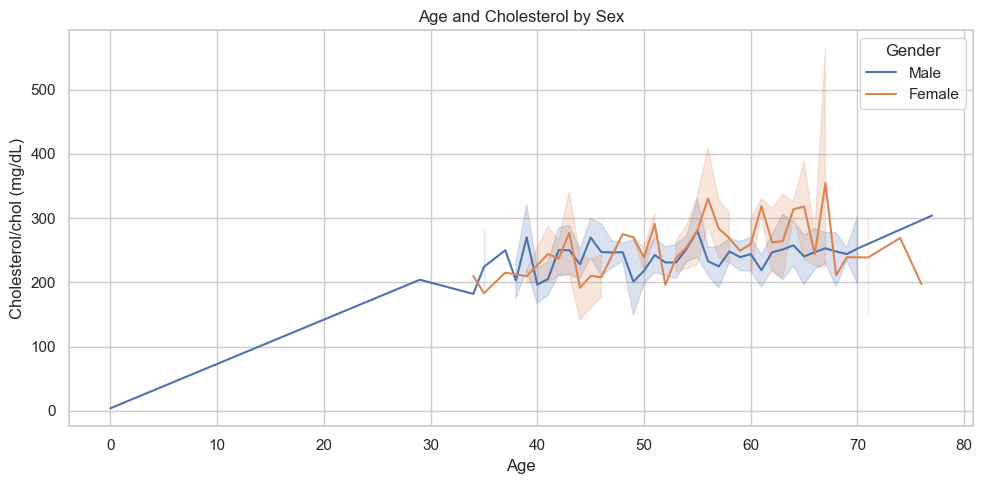

In [7]:
# Data Visualization

# Line Chart: Age and Cholesterol
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x= 'age', y='chol', hue='sex_label')
plt.title("Age and Cholesterol by Sex")
plt.xlabel("Age")
plt.ylabel("Cholesterol/chol (mg/dL)")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

#### ***✅ Explanation***
* The line chart shows the relationship between *Age* (x-axis) and *Cholesterol levels (mg/dL)* (y-axis), separated by *Sex (Male and Female)*.
* The chart helps visualize how cholesterol changes with age while comparing between genders.
* Two lines represent the two groups: Male (blue) and Female (orange).
* Cholesterol levels generally hover in a similar range for males and females across age groups.
* Females, especially of older ages (50s and 60s) have higher cholesterol levels compared to Males.
* Overlapping confidence intervals suggest that differences between male and female cholesterol levels may not be statistically significant.


### 📊 2. Bar Chart — Gender against Stress Depression Level by Disease Status

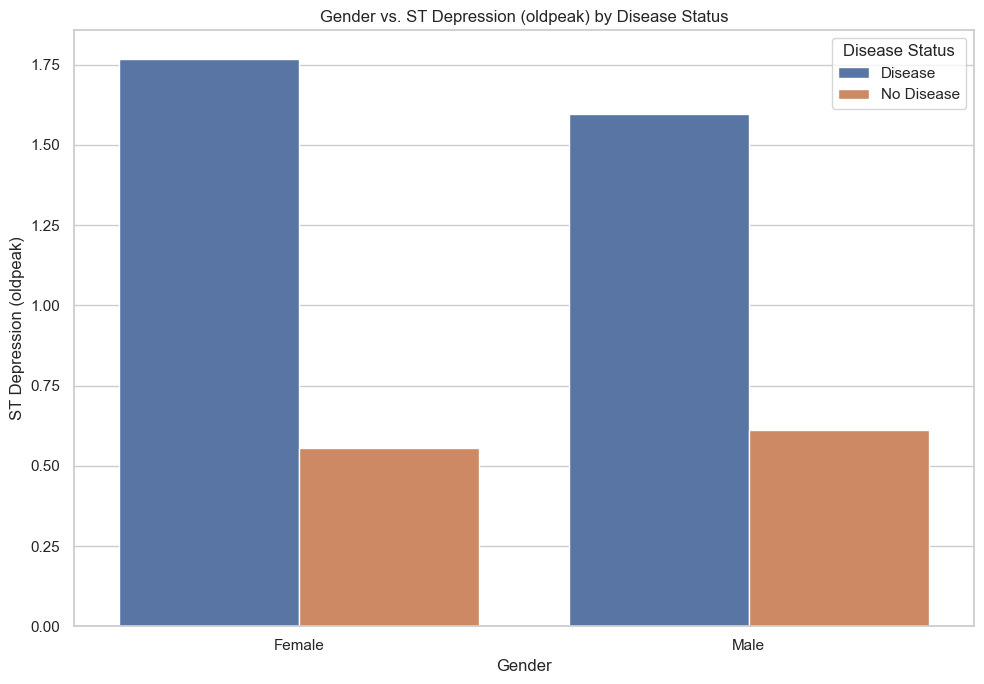

In [8]:
# Data Visualization

# Bar Chart: Oldpeak by Sex and Disease
plt.figure(figsize=(10, 7))
sns.barplot(data=grouped, x='sex_label', y='oldpeak', hue='disease_status')
plt.title("Gender vs. ST Depression (oldpeak) by Disease Status")
plt.xlabel("Gender")
plt.ylabel("ST Depression (oldpeak)")
plt.legend(title="Disease Status")
plt.tight_layout()
plt.show()

#### ***✅ Explanation***

- ST Depression (oldpeak) tends to be **higher in people diagnosed with disease**, regardless of gender.
- The difference between disease and no disease groups is large for both genders.
- This suggests that ST Depression is a useful indicator correlated with disease status.
- The chart also shows that females with disease might have slightly higher ST Depression on average compared to males with disease.



### 📉 3. Histogram — Max. Heart Rate(thalach/bpm) in Cleveland Dataset.

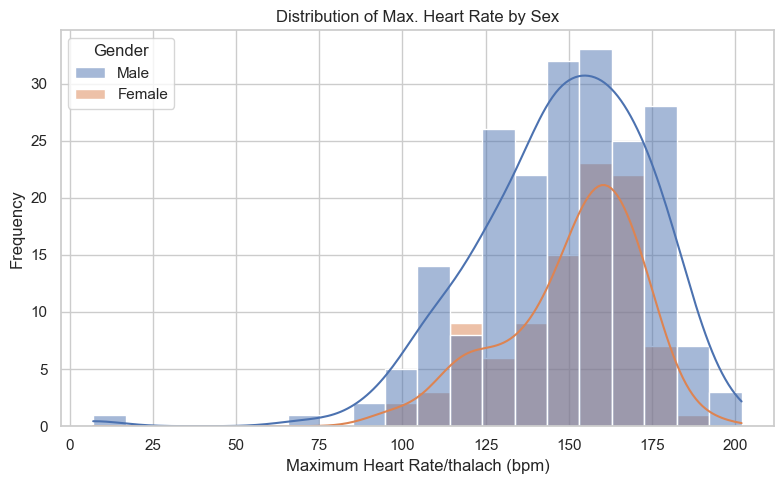

In [9]:
# Data Visualization: Histogram

df['Gender'] = df['sex'].map({0: 'Female', 1: 'Male'})

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="thalach", bins=20, hue="Gender", kde=True)
plt.title("Distribution of Max. Heart Rate by Sex")
plt.xlabel("Maximum Heart Rate/thalach (bpm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#### ***✅ Explanation***

* Males generally have a higher frequency of maximum heart rates between **140 and 180 bpm**.
* Females also peak around similar heart rate values but tend to have a slightly lower maximum frequency.
* Both distributions are roughly bell-shaped but males have a slightly wider spread in the heart rate distribution.
* There are very few individuals with heart rates below 75 bpm or above 190 bpm in both groups.
* The plot suggests that males tend to achieve higher maximum heart rates more frequently than females.
* The KDE lines help visualize the smooth underlying distribution beyond the discrete bins.
* This chart is useful for comparing cardiovascular performance or fitness levels by sex.



### 📉 4. Histogram — Cholesterol Level(mg/dL) in Cleveland Dataset.

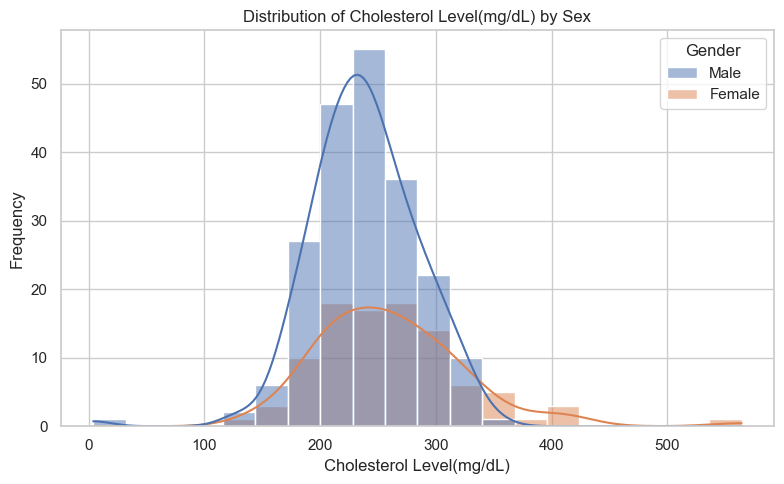

In [10]:
# Data Visualization: Histogram

df['Gender'] = df['sex'].map({0: 'Female', 1: 'Male'})

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="chol", bins=20, hue="Gender", kde=True)
plt.title("Distribution of Cholesterol Level(mg/dL) by Sex")
plt.xlabel("Cholesterol Level(mg/dL)")
plt.ylabel("Frequency")
# plt.legend(title="Gender")
plt.tight_layout()
plt.show()

#### ***✅ Explanation***
- Males’ cholesterol levels are mostly concentrated between 200 and 300 mg/dL with a clear peak.
- Females show a wider range of cholesterol levels, extending beyond 400 mg/dL.
- Female cholesterol levels are more spread out and variable compared to males.
- Females have very high cholesterol levels compared to males.